<a href="https://colab.research.google.com/github/duwain/Prediction-of-Product-Sales/blob/main/Outlet_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

* Author: Duwain Hofmeester

## Project Overview



## Load and Inspect Data

In [297]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)



Mounted at /content/drive


In [298]:
# Import required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Save the filepath and load the data as "df_titanic"
fpath= "/content/drive/MyDrive/Course 1/week 2/Data/sales_predictions_2023.csv"
df = pd.read_csv(fpath)

In [299]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**Scan the .info() to answer the following questions about the data:**

>Add your answers in this Markdown cell, right below each question:

**Q: A1) How many rows are there?**
- Your Answer:
  - `8523`

**Q: A2) How many columns are there?**
- Your Answer:
  - `12`


## Clean Data

In [301]:
duplicated_rows =df.duplicated()
print(f'There are {duplicated_rows.sum()} duplicate rows.')

There are 0 duplicate rows.


In [302]:
null_value = df.isna().sum()
print(null_value)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [303]:
categorical_placeholder = 'MISSING'

In [304]:
obj_col= list(df.describe(include = 'object'))
print(obj_col)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [305]:
for i in obj_col:
  df[i].fillna(value = categorical_placeholder, inplace = True)

In [306]:
num_col= list(df.describe(exclude = 'object'))
print(num_col)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


In [307]:
Num_placeholder =-1
for i in num_col:
  df[i].fillna(value = Num_placeholder, inplace = True)

In [308]:
print(f'There are {df.isna().sum().sum()} missing values.')

There are 0 missing values.


In [309]:
obj_col_1= df.describe(include = 'object')
for i in obj_col_1:
  print(df[i].value_counts())
  print('\n')

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


Mediu

In [310]:
df.replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'}, inplace = True)
df.replace({'Grocery Store': 'Supermarket Type4'}, inplace = True)

In [311]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [312]:
state = df.describe()
state.loc[['mean', 'min', 'max']]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Data Analysis

<Axes: ylabel='Count'>

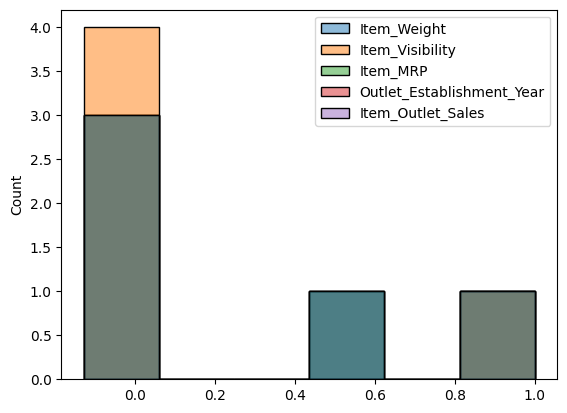

In [313]:
num = df.corr(numeric_only= True)
#for i in num:
#fig, ax= plt.subplots(figsize=(20,20))
sns.histplot(num)

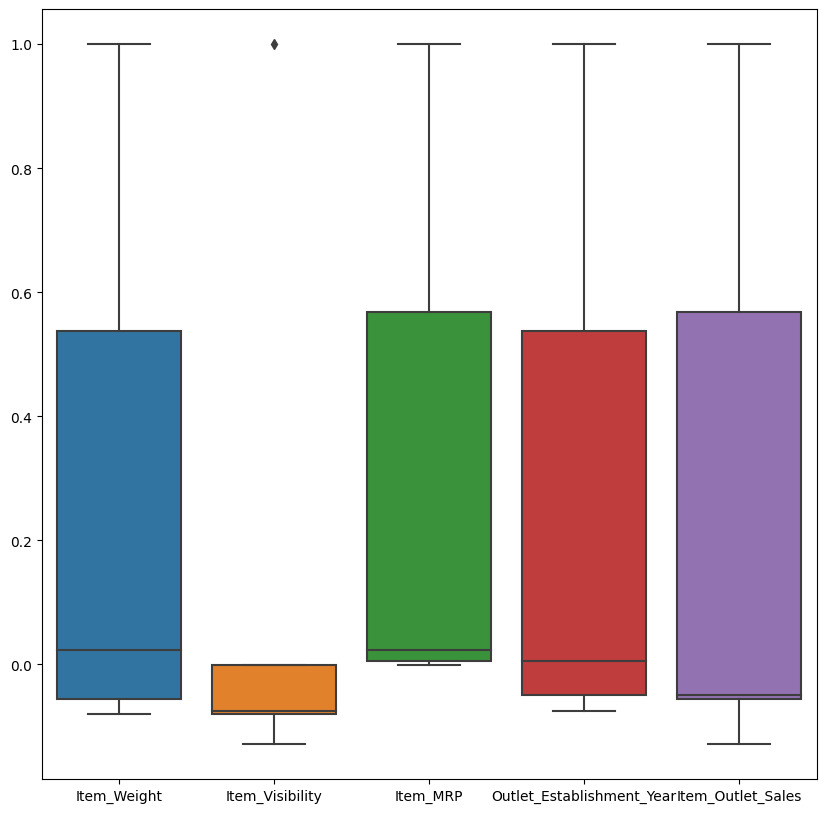

In [314]:
fig, ax= plt.subplots(figsize=(10,10))
ax = sns.boxplot(num, ax = ax)

<ipython-input-315-1d763bfdcb3e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= df.corr()


<Axes: >

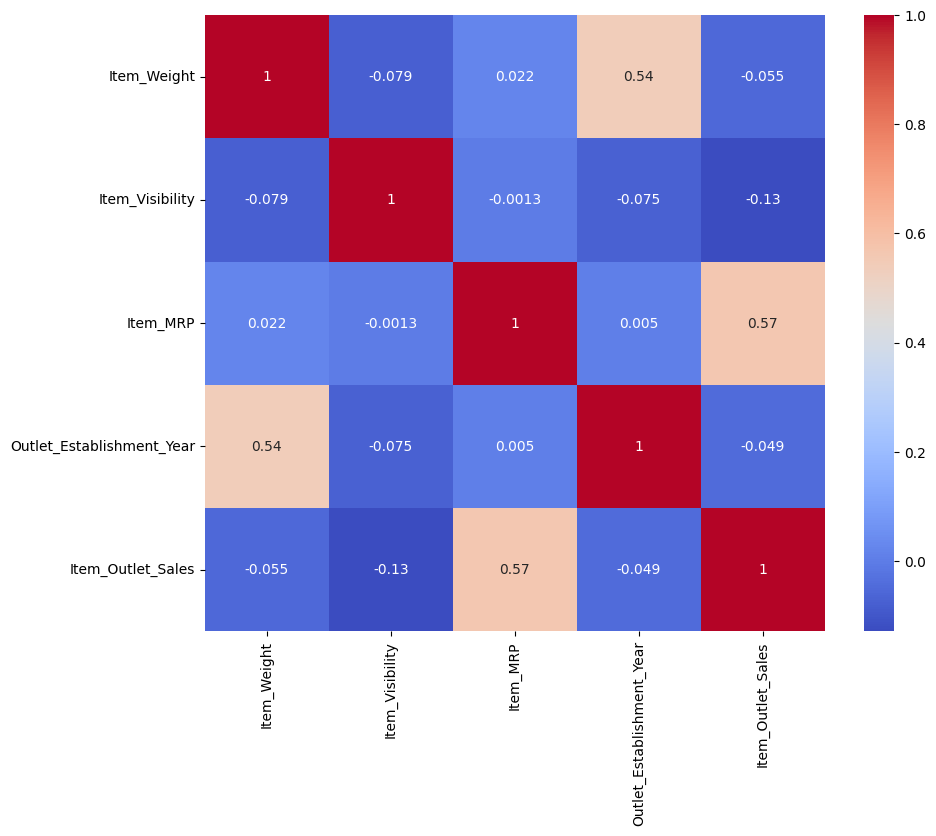

In [315]:
corr= df.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, cmap = 'coolwarm', annot = True)

## Feature Inspection

In [316]:
obj_col= list(df.describe(include = 'object'))
for i in obj_col:
  df[i]=df[i].replace('MISSING', np.nan)

In [317]:
num_col= list(df.describe(exclude = 'object'))
for i in num_col:
 df[i]=df[i].replace(-1, np.nan)

In [318]:
print(f'There are {df.isna().sum()} missing values.')

There are Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64 missing values.


In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


###### **Explore Univariate Categorical Function**

In [320]:
#from week 4 lecture
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

###### **Explore Univariate Numerical Function**

In [321]:
#from week 4 lecture
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


###### **Explore Multivariate Categorical Function**

In [322]:
#from week 4 lecture
def plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax

###### **Explore Multivariate Numerical Function**

In [323]:
#from week 4 lecture
def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales',
                           figsize=(6,4)):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

###Item_Identifier

In [324]:
feature= "Item_Identifier"
df[feature].dtypes

dtype('O')

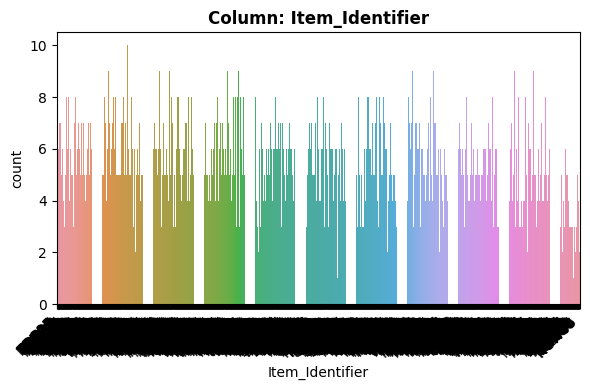

- NaN's Found: 0 (0.0%)
- Unique Values: 1559
- Most common value: 'FDW13' occurs 10 times (0.12%)
- Not constant or quasi-constant.


In [325]:
explore_categorical(df, feature);

**1. What type of feature is it? (Categorical (nominal), ordinal, numeric)**

  - This feature is Categorical (nominal).

**2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)**
  - There are 0 null values, or 0% of values.

**3. Is the feature constant or quasi-constant?**
  - The feature is neither constant nor quasi-constant.

**4. What is the cardinality? Is it high (>10)?**
  - There are 1559 unique values

**5. Would we know this feature before the target is determined?**
  - Yes.

**6. Is there a business case/understanding reason to exclude based on our business case?**
  - No.

###Multivariate Viz


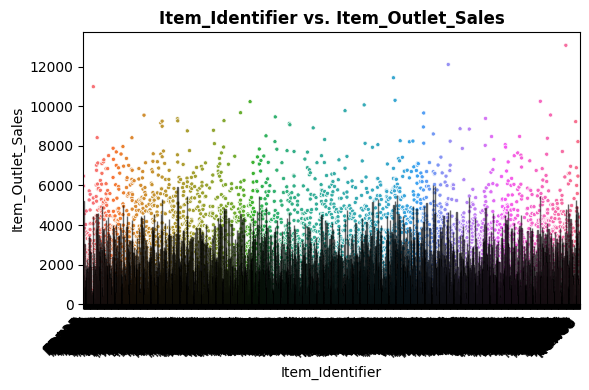

In [326]:
plot_categorical_vs_target(df,feature);

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - I would expect that this feature is  a direct predictor of the target.
2. Does this feature appear to be a predictor of the target?
  - This feature does seem to be a predictor of total sales.

###Item_Weight

In [327]:
feature = 'Item_Weight'
df[feature].dtypes

dtype('float64')

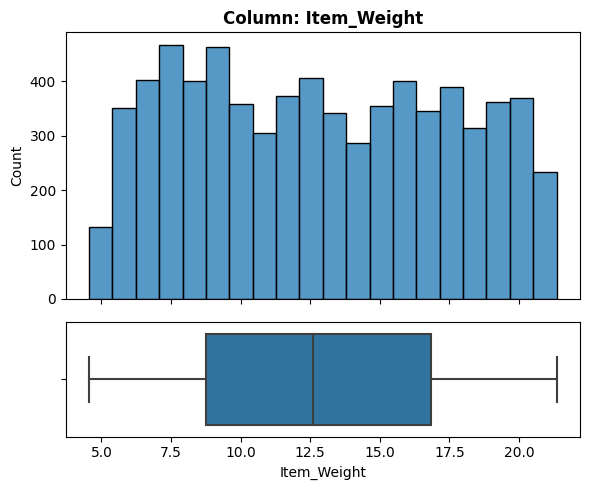

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [328]:
explore_numeric(df, feature);

**1. What type of feature is it? (Categorical (nominal), ordinal, numeric)**

> Indented block


  - This feature is numeric.

**2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)**
  - There are 1463 null values, or 17.17% of values.

**3. Is the feature constant or quasi-constant?**
  - The feature is neither constant nor quasi-constant.

**4. What is the cardinality? Is it high (>10)?**
  - N/A (numeric)

**5. Would we know this feature before the target is determined?**
  - Yes.

**6. Is there a business case/understanding reason to exclude based on our business case?**
  - No.

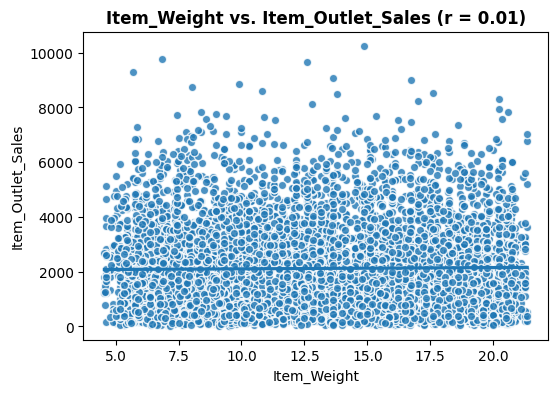

In [329]:
## Call Multivariate Numeric EDA function
plot_numeric_vs_target(df, feature);

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - No I would not as the item weight does not have an impact on the outlet sales.
2. Does this feature appear to be a predictor of the target?
  - This feature does not seem to be a predictor of Item Outlet Sales.

###Item_Fat_Content

In [330]:
feature = 'Item_Fat_Content'
df[feature].dtypes

dtype('O')

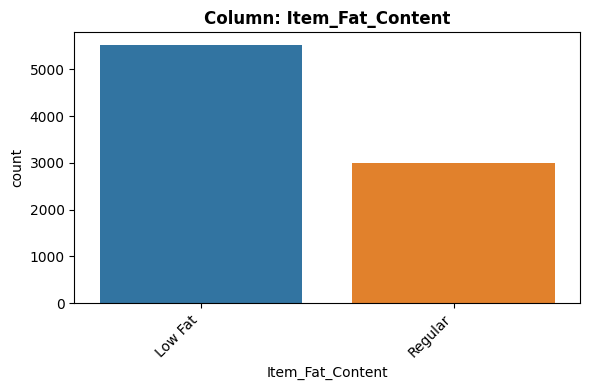

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [331]:
explore_categorical(df, feature);

**1. What type of feature is it? (Categorical (nominal), ordinal, numeric)**

> Indented block


  - This feature is Categorical (ordinal).

**2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)**
  - There are 0 null values, or 0% of values.

**3. Is the feature constant or quasi-constant?**
  - The feature is neither constant nor quasi-constant.

**4. What is the cardinality? Is it high (>10)?**
  -Low Cardinality (2)

**5. Would we know this feature before the target is determined?**
  - Yes.

**6. Is there a business case/understanding reason to exclude based on our business case?**
  - No.

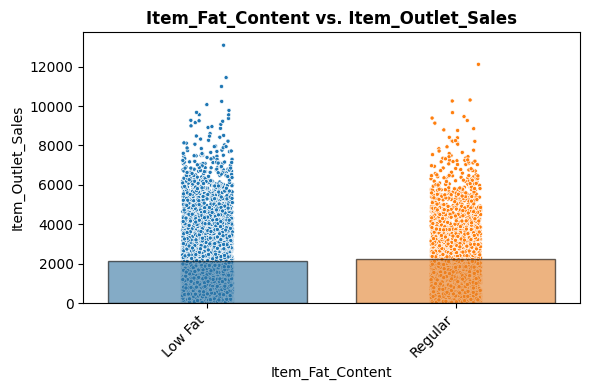

In [332]:
plot_categorical_vs_target(df,feature);

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - No I would not as the item weight does not have an impact on the outlet sales.
2. Does this feature appear to be a predictor of the target?
  - This feature does not seem to be a predictor of Item Outlet Sales.

###Item_Visibility

In [333]:
feature = 'Item_Visibility'
df[feature].dtypes

dtype('float64')

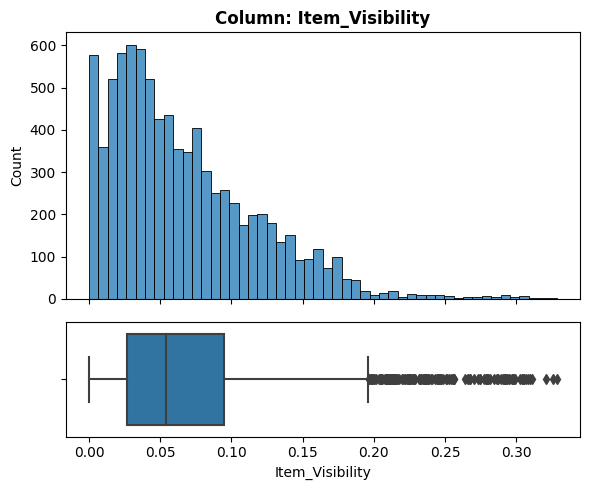

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [334]:
explore_numeric(df, feature);

**1. What type of feature is it? (Categorical (nominal), ordinal, numeric)**

> Indented block


  - This feature is numeric.

**2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)**
  - There are 0 null values, or 0% of values.

**3. Is the feature constant or quasi-constant?**
  - The feature is neither constant nor quasi-constant.

**4. What is the cardinality? Is it high (>10)?**
  - N/A (numeric)

**5. Would we know this feature before the target is determined?**
  - Yes.

**6. Is there a business case/understanding reason to exclude based on our business case?**
  - No.

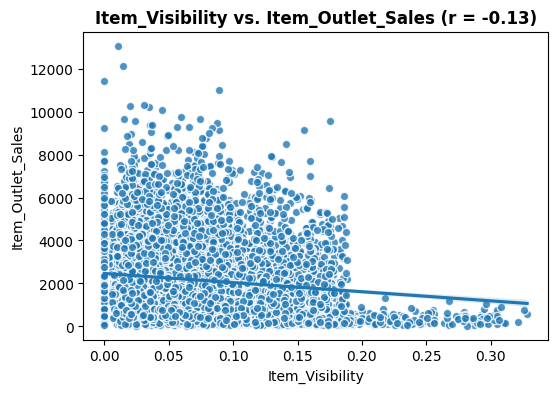

In [335]:
plot_numeric_vs_target(df, feature);

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - Yes it would seem as the item visibility does have an impact on the outlet sales.
2. Does this feature appear to be a predictor of the target?
  - This feature does seem to be a predictor of Item Outlet Sales.

###Item_Type

In [336]:
feature = 'Item_Type'
df[feature].dtypes

dtype('O')

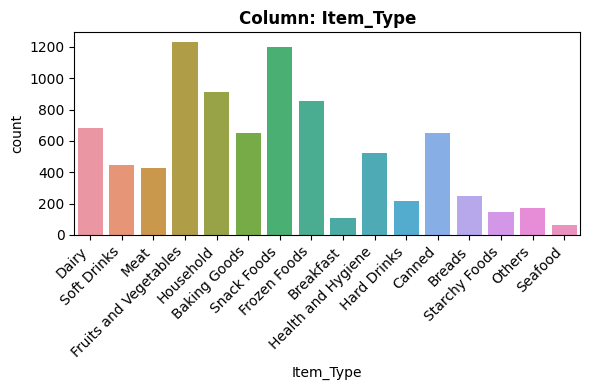

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [337]:
explore_categorical(df, feature);

**1. What type of feature is it? (Categorical (nominal), ordinal, numeric)**

> Indented block


  - This feature is Categorical (nominal).

**2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)**
  - There are 0 null values, or 0% of values.

**3. Is the feature constant or quasi-constant?**
  - The feature is neither constant nor quasi-constant.

**4. What is the cardinality? Is it high (>10)?**
  - There are 16 Unique values

**5. Would we know this feature before the target is determined?**
  - Yes.

**6. Is there a business case/understanding reason to exclude based on our business case?**
  - No.

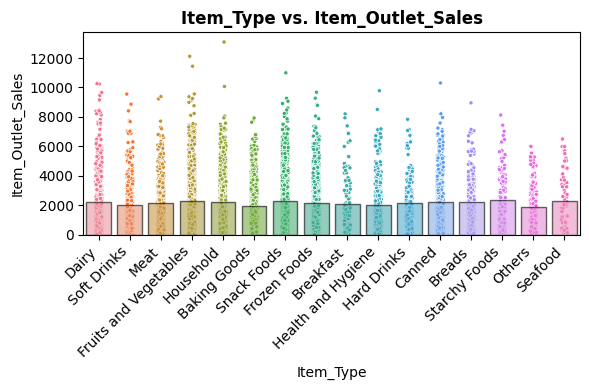

In [338]:
plot_categorical_vs_target(df,feature);

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - I would expect that this feature is  a direct predictor of the target
2. Does this feature appear to be a predictor of the target?
  - This feature does seem to be a predictor of Item Outlet Sales

###Item_MRP

In [339]:
feature = 'Item_MRP'
df[feature].dtypes

dtype('float64')

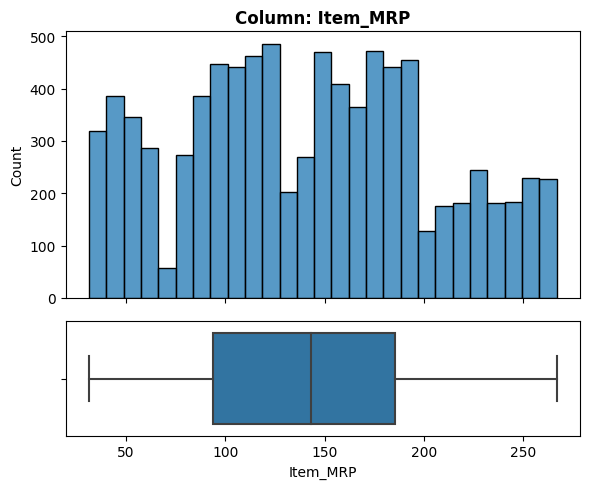

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [340]:
explore_numeric(df, feature);

**1. What type of feature is it? (Categorical (nominal), ordinal, numeric)**

> Indented block


  - This feature is numeric.

**2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)**
  - There are 0 null values, or 0% of values.

**3. Is the feature constant or quasi-constant?**
  - The feature is neither constant nor quasi-constant.

**4. What is the cardinality? Is it high (>10)?**
  - N/A (numeric)

**5. Would we know this feature before the target is determined?**
  - Yes.

**6. Is there a business case/understanding reason to exclude based on our business case?**
  - No.

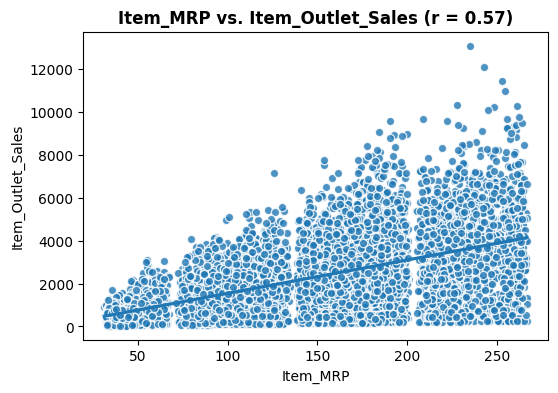

In [341]:
plot_numeric_vs_target(df, feature);

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - I would expect that this feature is  a direct predictor of the target beacuse as the Item MRP increases d so does the Outlet Sales.
2. Does this feature appear to be a predictor of the target?
  - This feature does seem to be a predictor of Item Outlet Sales

###Outlet_Identifier

In [342]:
feature = 'Outlet_Identifier'
df[feature].dtypes

dtype('O')

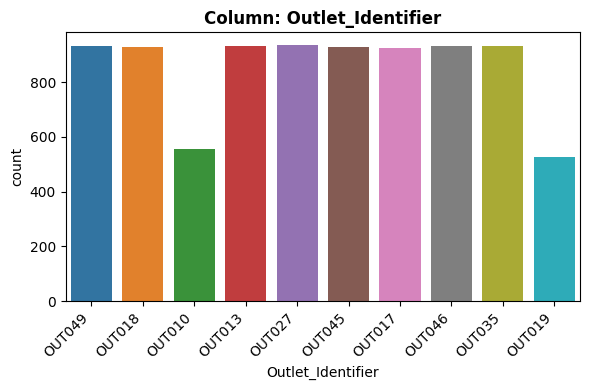

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [343]:
explore_categorical(df, feature);

**1. What type of feature is it? (Categorical (nominal), ordinal, numeric)**

> Indented block


  - This feature is categorical (ordinal).

**2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)**
  - There are 0 null values, or 0% of values.

**3. Is the feature constant or quasi-constant?**
  - The feature is neither constant nor quasi-constant.

**4. What is the cardinality? Is it high (>10)?**
  - The Cardinality is High

**5. Would we know this feature before the target is determined?**
  - Yes.

**6. Is there a business case/understanding reason to exclude based on our business case?**
  - No.

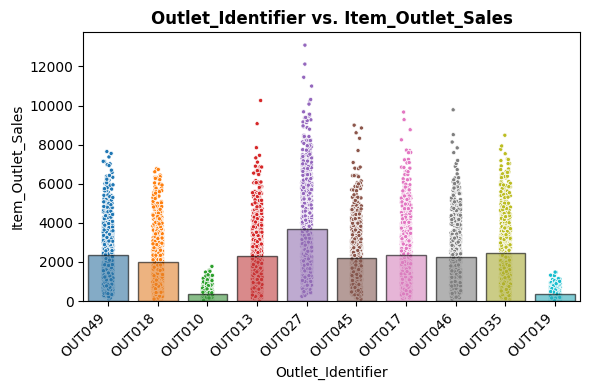

In [344]:
plot_categorical_vs_target(df, feature);

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - I would expect that this feature is  a direct predictor of the target.
2. Does this feature appear to be a predictor of the target?
  - This feature does seem to be a predictor of Item Outlet Sales

###Outlet_Establishment_Year

In [345]:
feature = 'Outlet_Establishment_Year'
df[feature].dtypes

dtype('int64')

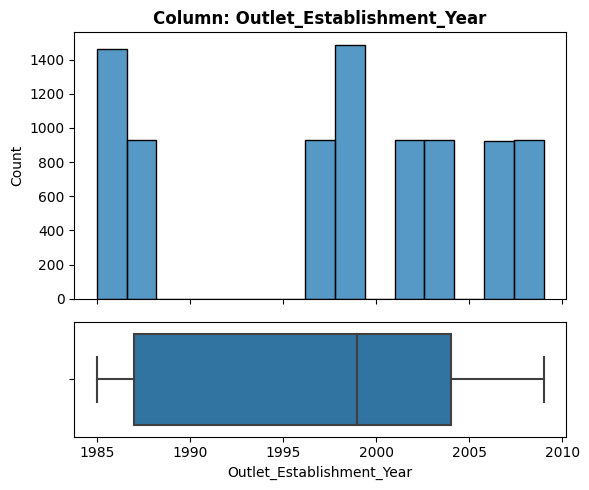

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [346]:
explore_numeric(df, feature);

**1. What type of feature is it? (Categorical (nominal), ordinal, numeric)**

> Indented block


  - This feature is numeric.

**2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)**
  - There are 0 null values, or 0% of values.

**3. Is the feature constant or quasi-constant?**
  - The feature is neither constant nor quasi-constant.

**4. What is the cardinality? Is it high (>10)?**
  - N/A (numeric)

**5. Would we know this feature before the target is determined?**
  - Yes.

**6. Is there a business case/understanding reason to exclude based on our business case?**
  - No.

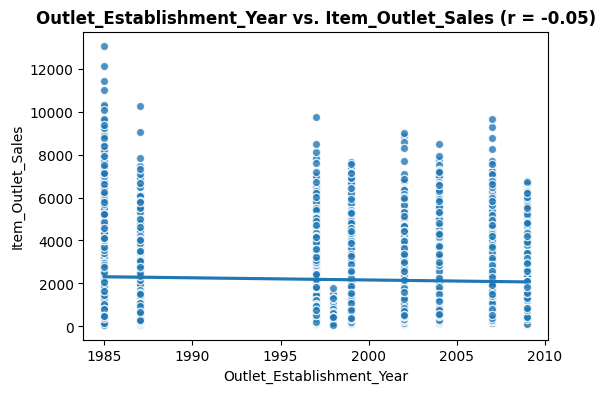

In [347]:
plot_numeric_vs_target(df, feature);

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - I would expect that this feature is  a direct predictor of the target. the older the establishment the more outlet sales
2. Does this feature appear to be a predictor of the target?
  - This feature does seem to be a predictor of Item Outlet Sales

###Outlet_Size

In [348]:
feature = 'Outlet_Size'
df[feature].dtypes

dtype('O')

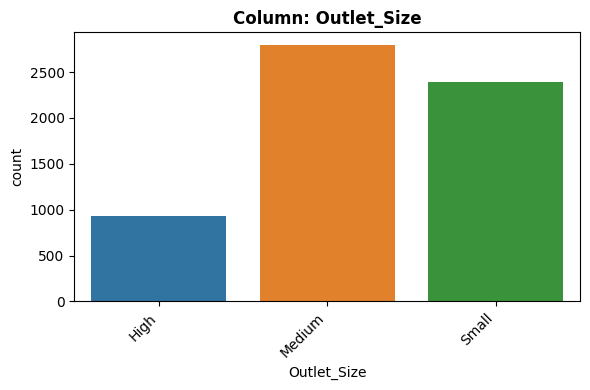

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [349]:
Size_order = ["High", "Medium", "Small"]
explore_categorical(df, feature,order=Size_order);

**1. What type of feature is it? (Categorical (nominal), ordinal, numeric)**

> Indented block


  - This feature is Categorical (ordinal).

**2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)**
  - There are 2410 null values, or 28.28% of values.

**3. Is the feature constant or quasi-constant?**
  - The feature is neither constant nor quasi-constant.

**4. What is the cardinality? Is it high (>10)?**
  - Low cardinality (4)

**5. Would we know this feature before the target is determined?**
  - Yes.

**6. Is there a business case/understanding reason to exclude based on our business case?**
  - No.

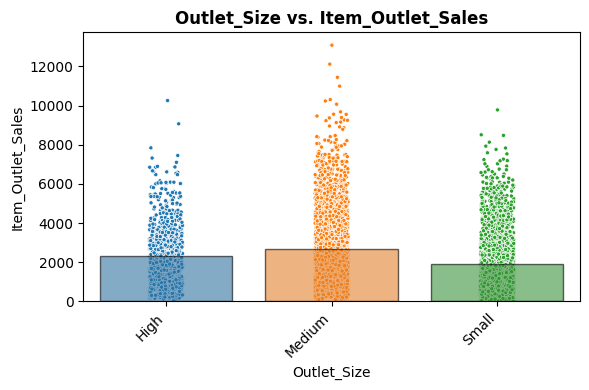

In [350]:
plot_categorical_vs_target(df, feature, order = Size_order);

###Outlet_Location_Type

In [351]:
feature = 'Outlet_Location_Type'
df[feature].dtypes

dtype('O')

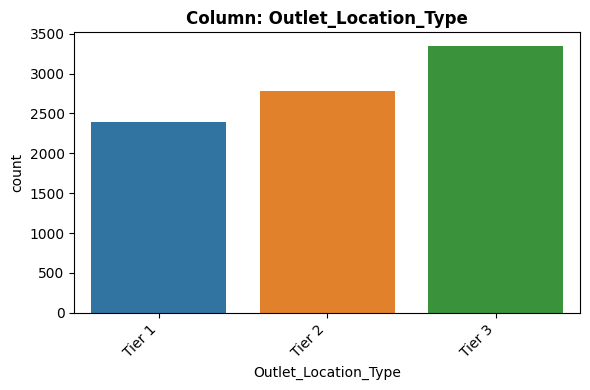

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [352]:
location_order = ["Tier 1", "Tier 2", "Tier 3"]
explore_categorical(df, feature, order= location_order);

**1. What type of feature is it? (Categorical (nominal), ordinal, numeric)**

> Indented block


  - This feature is Categorical (ordinal).

**2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)**
  - There are 0 null values, or 0% of values.

**3. Is the feature constant or quasi-constant?**
  - The feature is neither constant nor quasi-constant.

**4. What is the cardinality? Is it high (>10)?**
  - Low Cardinality (3)

**5. Would we know this feature before the target is determined?**
  - Yes.

**6. Is there a business case/understanding reason to exclude based on our business case?**
  - No.

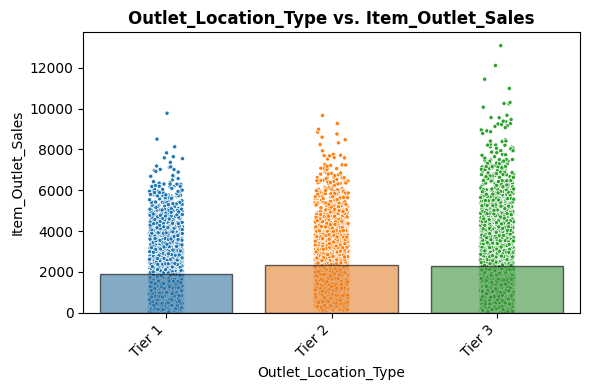

In [353]:
plot_categorical_vs_target(df, feature, order= location_order);

# Part 5

In [354]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)
import missingno
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')

In [355]:
fpath= "/content/drive/MyDrive/Course 1/week 2/Data/sales_predictions_2023.csv"
df = pd.read_csv(fpath)

In [356]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [358]:
## Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


In [359]:
## Display the total number of missing values
print(f'There are {df.isna().sum()} missing values.')

There are Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64 missing values.


In [360]:
obj_col_1= df.describe(include = 'object')
for i in obj_col_1:
  print(df[i].value_counts())
  print('\n')

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


Mediu

In [361]:
df.replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'}, inplace = True)
df.replace({'Grocery Store': 'Supermarket Type4'}, inplace = True)

In [362]:
## Define features (X) and target (y)
y =df['Item_Outlet_Sales']
x= df.drop(columns =['Item_Outlet_Sales'])

In [363]:
## Split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [364]:
# Save list of column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)


Numeric Columns: Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')


In [365]:
# instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()

In [366]:
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [367]:
num_pipe.fit(X_train[num_cols])

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [368]:
X_train_num_tf = num_pipe.transform(X_train[num_cols])
X_train_num_tf.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
4776,0.827485,-0.712775,1.828109,1.327849
7510,0.566644,-1.291052,0.603369,1.327849
5828,-0.121028,1.813319,0.244541,0.136187
5327,-1.158464,-1.004931,-0.952591,0.732018
4810,1.538870,-0.965484,-0.336460,0.493686


In [369]:
X_train_num_tf.isna().sum().sum()

0

In [370]:
# Creating a categorical data selector
cat_selector = make_column_selector(dtype_include = 'object')
cat_selector(X_train)

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [371]:
# Creating a pipline for handling categorical data
impute_categorical = SimpleImputer(strategy='most_frequent')
encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)

cat_pipe = make_pipeline(impute_categorical,encoder)
cat_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [372]:
# Fit on training data
cat_pipe.fit_transform(X_train[cat_selector(X_train)])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,Item_Identifier_DRC13,Item_Identifier_DRC25,Item_Identifier_DRC27,Item_Identifier_DRC36,Item_Identifier_DRC49,Item_Identifier_DRD01,Item_Identifier_DRD12,Item_Identifier_DRD13,Item_Identifier_DRD15,Item_Identifier_DRD24,Item_Identifier_DRD25,Item_Identifier_DRD27,Item_Identifier_DRD37,Item_Identifier_DRD49,Item_Identifier_DRD60,Item_Identifier_DRE01,Item_Identifier_DRE03,Item_Identifier_DRE12,Item_Identifier_DRE13,Item_Identifier_DRE15,Item_Identifier_DRE25,Item_Identifier_DRE27,Item_Identifier_DRE37,Item_Identifier_DRE48,Item_Identifier_DRE49,Item_Identifier_DRE60,Item_Identifier_DRF01,Item_Identifier_DRF03,Item_Identifier_DRF13,Item_Identifier_DRF15,Item_Identifier_DRF23,Item_Identifier_DRF25,Item_Identifier_DRF27,Item_Identifier_DRF36,Item_Identifier_DRF37,Item_Identifier_DRF48,Item_Identifier_DRF49,Item_Identifier_DRF51,Item_Identifier_DRF60,Item_Identifier_DRG01,...,Item_Identifier_NCY53,Item_Identifier_NCY54,Item_Identifier_NCZ05,Item_Identifier_NCZ06,Item_Identifier_NCZ17,Item_Identifier_NCZ18,Item_Identifier_NCZ29,Item_Identifier_NCZ30,Item_Identifier_NCZ41,Item_Identifier_NCZ42,Item_Identifier_NCZ53,Item_Identifier_NCZ54,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Type_Supermarket Type4
4776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [373]:
prep = make_column_transformer((cat_pipe,cat_selector),
                                       (num_pipe,num_cols))
prep

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False,
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7a8e0e183880>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object'))])

In [374]:
prep.fit_transform(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,pipeline-1__Item_Identifier_DRA12,pipeline-1__Item_Identifier_DRA24,pipeline-1__Item_Identifier_DRA59,pipeline-1__Item_Identifier_DRB01,pipeline-1__Item_Identifier_DRB13,pipeline-1__Item_Identifier_DRB24,pipeline-1__Item_Identifier_DRB25,pipeline-1__Item_Identifier_DRB48,pipeline-1__Item_Identifier_DRC01,pipeline-1__Item_Identifier_DRC12,pipeline-1__Item_Identifier_DRC13,pipeline-1__Item_Identifier_DRC25,pipeline-1__Item_Identifier_DRC27,pipeline-1__Item_Identifier_DRC36,pipeline-1__Item_Identifier_DRC49,pipeline-1__Item_Identifier_DRD01,pipeline-1__Item_Identifier_DRD12,pipeline-1__Item_Identifier_DRD13,pipeline-1__Item_Identifier_DRD15,pipeline-1__Item_Identifier_DRD24,pipeline-1__Item_Identifier_DRD25,pipeline-1__Item_Identifier_DRD27,pipeline-1__Item_Identifier_DRD37,pipeline-1__Item_Identifier_DRD49,pipeline-1__Item_Identifier_DRD60,pipeline-1__Item_Identifier_DRE01,pipeline-1__Item_Identifier_DRE03,pipeline-1__Item_Identifier_DRE12,pipeline-1__Item_Identifier_DRE13,pipeline-1__Item_Identifier_DRE15,pipeline-1__Item_Identifier_DRE25,pipeline-1__Item_Identifier_DRE27,pipeline-1__Item_Identifier_DRE37,pipeline-1__Item_Identifier_DRE48,pipeline-1__Item_Identifier_DRE49,pipeline-1__Item_Identifier_DRE60,pipeline-1__Item_Identifier_DRF01,pipeline-1__Item_Identifier_DRF03,pipeline-1__Item_Identifier_DRF13,pipeline-1__Item_Identifier_DRF15,pipeline-1__Item_Identifier_DRF23,pipeline-1__Item_Identifier_DRF25,pipeline-1__Item_Identifier_DRF27,pipeline-1__Item_Identifier_DRF36,pipeline-1__Item_Identifier_DRF37,pipeline-1__Item_Identifier_DRF48,pipeline-1__Item_Identifier_DRF49,pipeline-1__Item_Identifier_DRF51,pipeline-1__Item_Identifier_DRF60,pipeline-1__Item_Identifier_DRG01,...,pipeline-1__Item_Identifier_NCZ17,pipeline-1__Item_Identifier_NCZ18,pipeline-1__Item_Identifier_NCZ29,pipeline-1__Item_Identifier_NCZ30,pipeline-1__Item_Identifier_NCZ41,pipeline-1__Item_Identifier_NCZ42,pipeline-1__Item_Identifier_NCZ53,pipeline-1__Item_Identifier_NCZ54,pipeline-1__Item_Fat_Content_Low Fat,pipeline-1__Item_Fat_Content_Regular,pipeline-1__Item_Type_Baking Goods,pipeline-1__Item_Type_Breads,pipeline-1__Item_Type_Breakfast,pipeline-1__Item_Type_Canned,pipeline-1__Item_Type_Dairy,pipeline-1__Item_Type_Frozen Foods,pipeline-1__Item_Type_Fruits and Vegetables,pipeline-1__Item_Type_Hard Drinks,pipeline-1__Item_Type_Health and Hygiene,pipeline-1__Item_Type_Household,pipeline-1__Item_Type_Meat,pipeline-1__Item_Type_Others,pipeline-1__Item_Type_Seafood,pipeline-1__Item_Type_Snack Foods,pipeline-1__Item_Type_Soft Drinks,pipeline-1__Item_Type_Starchy Foods,pipeline-1__Outlet_Identifier_OUT010,pipeline-1__Outlet_Identifier_OUT013,pipeline-1__Outlet_Identifier_OUT017,pipeline-1__Outlet_Identifier_OUT018,pipeline-1__Outlet_Identifier_OUT019,pipeline-1__Outlet_Identifier_OUT027,pipeline-1__Outlet_Identifier_OUT035,pipeline-1__Outlet_Identifier_OUT045,pipeline-1__Outlet_Identifier_OUT046,pipeline-1__Outlet_Identifier_OUT049,pipeline-1__Outlet_Size_High,pipeline-1__Outlet_Size_Medium,pipeline-1__Outlet_Size_Small,pipeline-1__Outlet_Location_Type_Tier 1,pipeline-1__Outlet_Location_Type_Tier 2,pipeline-1__Outlet_Location_Type_Tier 3,pipeline-1__Outlet_Type_Supermarket Type1,pipeline-1__Outlet_Type_Supermarket Type2,pipeline-1__Outlet_Type_Supermarket Type3,pipeline-1__Outlet_Type_Supermarket Type4,pipeline-2__Item_Weight,pipeline-2__Item_Visibility,pipeline-2__Item_MRP,pipeline-2__Outlet_Establishment_Year
4776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.827485,-0.712775,1.828109,1.327849
7510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

## Part 6

#### Imports

In [375]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [376]:
prep.fit_transform(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,pipeline-1__Item_Identifier_DRA12,pipeline-1__Item_Identifier_DRA24,pipeline-1__Item_Identifier_DRA59,pipeline-1__Item_Identifier_DRB01,pipeline-1__Item_Identifier_DRB13,pipeline-1__Item_Identifier_DRB24,pipeline-1__Item_Identifier_DRB25,pipeline-1__Item_Identifier_DRB48,pipeline-1__Item_Identifier_DRC01,pipeline-1__Item_Identifier_DRC12,pipeline-1__Item_Identifier_DRC13,pipeline-1__Item_Identifier_DRC25,pipeline-1__Item_Identifier_DRC27,pipeline-1__Item_Identifier_DRC36,pipeline-1__Item_Identifier_DRC49,pipeline-1__Item_Identifier_DRD01,pipeline-1__Item_Identifier_DRD12,pipeline-1__Item_Identifier_DRD13,pipeline-1__Item_Identifier_DRD15,pipeline-1__Item_Identifier_DRD24,pipeline-1__Item_Identifier_DRD25,pipeline-1__Item_Identifier_DRD27,pipeline-1__Item_Identifier_DRD37,pipeline-1__Item_Identifier_DRD49,pipeline-1__Item_Identifier_DRD60,pipeline-1__Item_Identifier_DRE01,pipeline-1__Item_Identifier_DRE03,pipeline-1__Item_Identifier_DRE12,pipeline-1__Item_Identifier_DRE13,pipeline-1__Item_Identifier_DRE15,pipeline-1__Item_Identifier_DRE25,pipeline-1__Item_Identifier_DRE27,pipeline-1__Item_Identifier_DRE37,pipeline-1__Item_Identifier_DRE48,pipeline-1__Item_Identifier_DRE49,pipeline-1__Item_Identifier_DRE60,pipeline-1__Item_Identifier_DRF01,pipeline-1__Item_Identifier_DRF03,pipeline-1__Item_Identifier_DRF13,pipeline-1__Item_Identifier_DRF15,pipeline-1__Item_Identifier_DRF23,pipeline-1__Item_Identifier_DRF25,pipeline-1__Item_Identifier_DRF27,pipeline-1__Item_Identifier_DRF36,pipeline-1__Item_Identifier_DRF37,pipeline-1__Item_Identifier_DRF48,pipeline-1__Item_Identifier_DRF49,pipeline-1__Item_Identifier_DRF51,pipeline-1__Item_Identifier_DRF60,pipeline-1__Item_Identifier_DRG01,...,pipeline-1__Item_Identifier_NCZ17,pipeline-1__Item_Identifier_NCZ18,pipeline-1__Item_Identifier_NCZ29,pipeline-1__Item_Identifier_NCZ30,pipeline-1__Item_Identifier_NCZ41,pipeline-1__Item_Identifier_NCZ42,pipeline-1__Item_Identifier_NCZ53,pipeline-1__Item_Identifier_NCZ54,pipeline-1__Item_Fat_Content_Low Fat,pipeline-1__Item_Fat_Content_Regular,pipeline-1__Item_Type_Baking Goods,pipeline-1__Item_Type_Breads,pipeline-1__Item_Type_Breakfast,pipeline-1__Item_Type_Canned,pipeline-1__Item_Type_Dairy,pipeline-1__Item_Type_Frozen Foods,pipeline-1__Item_Type_Fruits and Vegetables,pipeline-1__Item_Type_Hard Drinks,pipeline-1__Item_Type_Health and Hygiene,pipeline-1__Item_Type_Household,pipeline-1__Item_Type_Meat,pipeline-1__Item_Type_Others,pipeline-1__Item_Type_Seafood,pipeline-1__Item_Type_Snack Foods,pipeline-1__Item_Type_Soft Drinks,pipeline-1__Item_Type_Starchy Foods,pipeline-1__Outlet_Identifier_OUT010,pipeline-1__Outlet_Identifier_OUT013,pipeline-1__Outlet_Identifier_OUT017,pipeline-1__Outlet_Identifier_OUT018,pipeline-1__Outlet_Identifier_OUT019,pipeline-1__Outlet_Identifier_OUT027,pipeline-1__Outlet_Identifier_OUT035,pipeline-1__Outlet_Identifier_OUT045,pipeline-1__Outlet_Identifier_OUT046,pipeline-1__Outlet_Identifier_OUT049,pipeline-1__Outlet_Size_High,pipeline-1__Outlet_Size_Medium,pipeline-1__Outlet_Size_Small,pipeline-1__Outlet_Location_Type_Tier 1,pipeline-1__Outlet_Location_Type_Tier 2,pipeline-1__Outlet_Location_Type_Tier 3,pipeline-1__Outlet_Type_Supermarket Type1,pipeline-1__Outlet_Type_Supermarket Type2,pipeline-1__Outlet_Type_Supermarket Type3,pipeline-1__Outlet_Type_Supermarket Type4,pipeline-2__Item_Weight,pipeline-2__Item_Visibility,pipeline-2__Item_MRP,pipeline-2__Outlet_Establishment_Year
4776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.827485,-0.712775,1.828109,1.327849
7510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [377]:
## Make and fit model
linreg =LinearRegression()
linreg_pipe = make_pipeline(prep, linreg)
linreg_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False,
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a8e0e183880>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object'))])),
                ('linearregression', LinearRegression())])

In [378]:
linreg_pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False,
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a8e0e183880>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object'))])),
                ('linearregression', LinearRegression())])

In [379]:
# Get predictions to use to evaluate model
y_hat_train = linreg_pipe.predict(X_train)
y_hat_test = linreg_pipe.predict(X_test)

In [380]:
def evaluate_model(y_true, y_pred, split='training'):
  """ prints RMSE, and R2 metrics, include which data split was evaluated

  Args:
    y_true: y-train or y-test
    y_pred: result of model.predict(X)
    split: which data split is being evaluate ['training','test']
  """

  r2 = r2_score(y_true,y_pred)
  mae = mean_absolute_error(y_true,y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true,y_pred,squared=False)


  print(f'Results for {split} data:')
  print(f"  - R^2 = {round(r2,3)}")
  print(f"  - MAE = {round(mae,3)}")
  print(f"  - MSE = {round(mse,3)}")
  print(f"  - RMSE = {round(rmse,3)}")
  print()

In [381]:
## Evaluate model's performance
evaluate_model(y_train, y_hat_train,split='training')
evaluate_model(y_test, y_hat_test,split='testing')

Results for training data:
  - R^2 = 0.671
  - MAE = 737.443
  - MSE = 974809.099
  - RMSE = 987.324

Results for testing data:
  - R^2 = -9.118986563523751e+20
  - MAE = 2790908394522.256
  - MSE = 2.5159076816576086e+27
  - RMSE = 50158824564154.3



### to what extent is this model overfit/underfit?
- The model is overfitting

In [382]:
# Instantiate default random forest model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
# Model Pipeline
rf_pipe = make_pipeline(prep, rf)

In [383]:
rf_pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False,
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a8e0e183880>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object'))])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [384]:
## Get predictions for training and test data
y_hat_train = rf_pipe.predict(X_train)
y_hat_test = rf_pipe.predict(X_test)

In [385]:
evaluate_model(y_train, y_hat_train,split='training')
evaluate_model(y_test, y_hat_test,split='testing')

Results for training data:
  - R^2 = 0.937
  - MAE = 297.695
  - MSE = 185047.718
  - RMSE = 430.172

Results for testing data:
  - R^2 = 0.549
  - MAE = 775.041
  - MSE = 1243331.733
  - RMSE = 1115.048



### Compare the training vs. test R-squared values and answer the question: to what extent is this model overfit/underfit?
- The Model is overfitting because the RMSE for training is much lower than the RMSE for testing. The model is also performing well on the training dataset but not on the testing dataset

### Compare this model's performance to the linear regression model: which model has the best test scores?
- the randomforest performed better

In [386]:
from sklearn.model_selection import GridSearchCV

In [387]:
# Parameters for tuning
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False,
                                                                   sparse_output=False))]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7a8e0e183880>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',

In [388]:

params = {'randomforestregressor__max_depth': [None,10,15,20],
          'randomforestregressor__n_estimators':[10,100,150,200],
          'randomforestregressor__min_samples_leaf':[2,3,4],
          'randomforestregressor__max_features':['sqrt','log2',None],
          'randomforestregressor__oob_score':[True,False],
          }



In [399]:
# Instantiate the gridsearch
gridsearch = GridSearchCV(rf_pipe, params, cv=2, n_jobs=-1, verbose=1)
# Fit the gridsearch on training data
gridsearch.fit(X_train, y_train)

Fitting 2 folds for each of 288 candidates, totalling 576 fits


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False,
                                                                                                        sparse_output=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7a8e0e...
                                        RandomForestRegressor(n_estimators=5000,
                                                              random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [None, 10, 15, 20],
                         'randomforestregressor__max_features': ['sqrt', 'log2',
                                                                 None],
                         'randomforestregressor__min_samples_leaf': [2, 3, 4],
                         'randomforestregressor__n_estimators': [10, 100, 150,
                                                                 200],
                         'randomforestregressor__oob_score': [True, False]},
             verbose=1)

In [400]:
# Obtain best parameters
gridsearch.best_params_

{'randomforestregressor__max_depth': 10,
 'randomforestregressor__max_features': None,
 'randomforestregressor__min_samples_leaf': 2,
 'randomforestregressor__n_estimators': 200,
 'randomforestregressor__oob_score': True}

In [401]:
# Define and refit best model
best_rf = gridsearch.best_estimator_
y_hat_train = best_rf.predict(X_train)
y_hat_test = best_rf.predict(X_test)
evaluate_model(y_train, y_hat_train,split='training')
evaluate_model(y_test, y_hat_test,split='testing')

Results for training data:
  - R^2 = 0.696
  - MAE = 669.263
  - MSE = 900145.308
  - RMSE = 948.76

Results for testing data:
  - R^2 = 0.592
  - MAE = 737.147
  - MSE = 1124362.519
  - RMSE = 1060.36



### Model Performance

- Overall, the best model is the tuned Random Forest Regressor Model.It by far outperformed the linear regression model.

- The model had an accuracy of 59% which makes it accpetable but it's not the best

- When looking at the RMSE of the testing and training results we can see there is a bit of Bais

- RMSE demostrate the root mean square error of the model (the lower the RMSE the better the model performs)

- Based on the test and training score of the model it is not overfitting nor underfitting, it is just performing poorly